In [1]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('/content/Plots and Graphs.xlsb.xlsx',sheet_name='Parametric Study')

In [3]:
data=data.dropna(how='all',axis=1)
data

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,Design Point 1,Design Point 2,Design Point 3,Design Point 4,Design Point 5,Design Point 6,Design Point 7,Design Point 8,Design Point 9,Design Point 10,Design Point 11,Design Point 12
1,Number of cells per X (Basic Mesh) [ ],100,126,159,200,252,317,400,504,635,800,1008,1270
2,Number of cells per Y (Basic Mesh) [ ],28,35,44,56,71,89,112,141,178,224,282,356
3,Number of cells per Z (Basic Mesh) [ ],3,4,5,6,8,10,12,15,19,24,30,38
4,CPU Time,2,3,3,6,10,21,40,96,224,561,1442,2237
5,Cells,1468,2500,4886,9740,18536,34810,65895,127762,247958,490704,957727,1888075
6,Total Pdif Goal 1 [Pa],1507.625376,1221.974371,1520.214334,1448.084361,1329.569011,1235.260528,1194.529042,1173.92894,1170.225978,1160.838512,1141.123663,1132.79887
7,Static Pdif Goal 1 [Pa],884.595055,600.674719,897.107741,825.414781,707.617478,613.88038,573.395673,552.92038,549.239854,539.909263,520.31386,512.039505
8,Total cells,1468,2500,4886,9740,18536,34810,65895,127762,247958,490704,957727,1888075


In [4]:
data_main=pd.read_excel('/content/Plots and Graphs.xlsb.xlsx',sheet_name='Main Plots')

In [5]:
data_main=data_main.dropna(how='all',axis=1).drop(columns='Unnamed: 11').drop(columns='Unnamed: 12').drop(index=[1,2,7,8,12,13]).dropna(how='all',axis=1)
data_main

,Trial #,Target Mesh Size,Mesh Max,Mesh Min,Cell Count,Time,Iter,Pdif
0,1.0,40.0,4.00,35.00,2433.0,3.5,35.0,1054.090
3,4.0,20.0,22.00,18.00,20353.0,5.0,154.0,577.877
4,5.0,15.8,17.38,14.22,39023.0,7.8,159.0,527.030
5,6.0,12.6,13.86,11.34,73645.0,11.2,177.0,523.716
6,7.0,10.0,11.00,9.00,122505.0,27.3,273.0,518.985
9,10.0,5.0,5.50,4.50,623734.0,178.0,388.0,513.609
10,11.0,4.0,4.40,3.60,1572107.0,616.3,531.0,505.888
11,12.0,3.5,3.85,3.15,2274369.0,1048.5,609.0,506.689


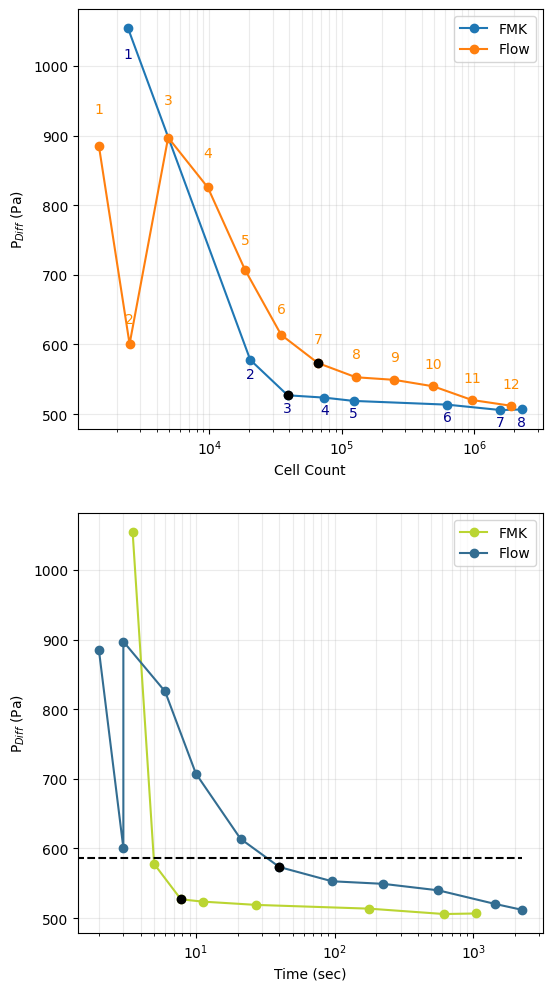

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(6,12))


# Data Main -- Data Table from Main Plots Excel Sheet
# Data -- Data Table from Parametric Study Excel Sheet

# Top Plot
ax1.plot(data_main['Cell Count'],data_main['Pdif'],'o-',label='FMK')
ax1.plot(data.iloc[8][1:],data.iloc[7][1:],'o-',label='Flow')

# Selecting points to change color (Black, 'k')
ax1.plot(data.iloc[8][1:][6],data.iloc[7][1:][6],'ko')
ax1.plot(data_main['Cell Count'].iloc[2],data_main['Pdif'].iloc[2],'ko')

# Adding a legend in best location
ax1.legend(loc=0)

# Labelling axes
ax1.set_xlabel('Cell Count')
ax1.set_ylabel('P$_{Diff}$ (Pa)')

# Specifying grid lines
ax1.grid(axis='both',which='both',alpha=0.25)

# Scaling x axis to log scale
ax1.set_xscale('log',base=10)

#BAD532 (GREEN) #98989A (GREY) #336D91 (DARK BLUE) #00AEEF (LIGHT BLUE)


# Bottom Plot
ax2.plot(data_main['Time'],data_main['Pdif'],'o-',label='FMK',color='#BAD532')
ax2.plot(data.iloc[4][1:],data.iloc[7][1:],'o-',label='Flow',color='#336D91')

# Selecting points to change color (Black, 'k')
ax2.plot(data.iloc[4][1:][6],data.iloc[7][1:][6],'ko')
ax2.plot(data_main['Time'].iloc[2],data_main['Pdif'].iloc[2],'ko')

# Adding a legend in best location
ax2.legend(loc=0)

# Labelling axes
ax2.set_xlabel('Time (sec)')
ax2.set_ylabel('P$_{Diff}$ (Pa)')

# Specifying grid lines
ax2.grid(axis='both',which='both',alpha=0.25)

# Scaling x axis to log scale
ax2.set_xscale('log',base=10)

# Horizontal Line that is dashed (threshold)
#ax2.plot([0,max(data.iloc[4][1:])],[525,525],'k--')
ax2.plot([0,max(data.iloc[4][1:])],[586,586],'k--')

# Conencting lines
#ax1.plot([data.iloc[8][1:][6],data_main['Cell Count'].iloc[2]],[data.iloc[7][1:][6],data_main['Pdif'].iloc[2]],'k-',alpha=0.75)
#ax2.plot([data.iloc[4][1:][6],data_main['Time'].iloc[2]],[data.iloc[7][1:][6],data_main['Pdif'].iloc[2]],'k-',alpha=0.75)

# Data Labels above/below marker
for i in range(12): # Flow
  ax1.text(data.iloc[8][1:][i],data.iloc[7][1:][i]*1.06,str(i+1),color='darkorange',horizontalalignment='center',verticalalignment='center')
for i in range(8): # FMK
  ax1.text(data_main['Cell Count'].iloc[i],data_main['Pdif'].iloc[i]*0.965,str(i+1),color='darkblue',horizontalalignment='center',verticalalignment='center')

plt.show()

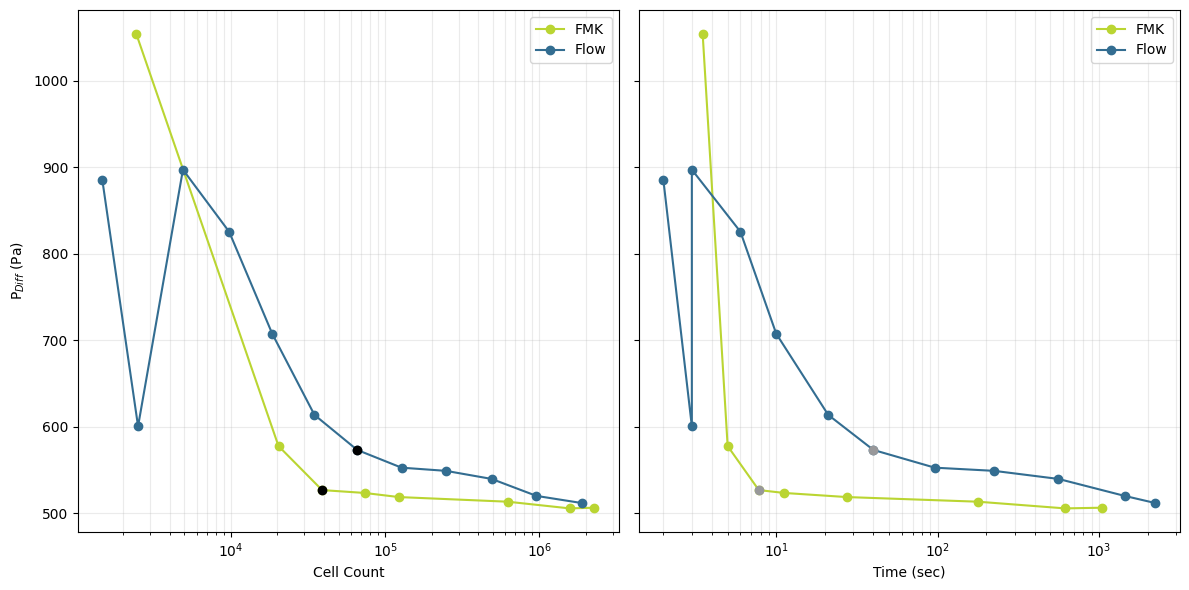

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12,6), sharey=True)


# Data Main -- Data Table from Main Plots Excel Sheet
# Data -- Data Table from Parametric Study Excel Sheet

# Top Plot
ax1.plot(data_main['Cell Count'],data_main['Pdif'],'o-',label='FMK',color='#BAD532')
ax1.plot(data.iloc[8][1:],data.iloc[7][1:],'o-',label='Flow',color='#336D91')

# Selecting points to change color (Black, 'k')
ax1.plot(data.iloc[8][1:][6],data.iloc[7][1:][6],'ko')
ax1.plot(data_main['Cell Count'].iloc[2],data_main['Pdif'].iloc[2],'ko')

# Adding a legend in best location
ax1.legend(loc=0)

# Labelling axes
ax1.set_xlabel('Cell Count')
ax1.set_ylabel('P$_{Diff}$ (Pa)')

# Specifying grid lines
ax1.grid(axis='both',which='both',alpha=0.25)

# Scaling x axis to log scale
ax1.set_xscale('log',base=10)

#BAD532 (GREEN) #98989A (GREY) #336D91 (DARK BLUE) #00AEEF (LIGHT BLUE)


# Bottom Plot
ax2.plot(data_main['Time'],data_main['Pdif'],'o-',label='FMK',color='#BAD532')
ax2.plot(data.iloc[4][1:],data.iloc[7][1:],'o-',label='Flow',color='#336D91')

# Selecting points to change color (Black, 'k')
ax2.plot(data.iloc[4][1:][6],data.iloc[7][1:][6],'o',color='#98989A')
ax2.plot(data_main['Time'].iloc[2],data_main['Pdif'].iloc[2],'o',color='#98989A')

# Adding a legend in best location
ax2.legend(loc=0)

# Labelling axes
ax2.set_xlabel('Time (sec)')
#ax2.set_ylabel('P$_{Diff}$ (Pa)')

# Specifying grid lines (alpha = transparency keyword -- alpha=1 (opaque), alpha=0 (transparent))
ax2.grid(axis='both',which='both',alpha=0.25)

# Scaling x axis to log scale
ax2.set_xscale('log',base=10)

# Horizontal Line that is dashed (threshold)
#ax2.plot([0,max(data.iloc[4][1:])],[525,525],'k--')
#ax2.plot([0,max(data.iloc[4][1:])],[586,586],'k--')

# Conencting lines
#ax1.plot([data.iloc[8][1:][6],data_main['Cell Count'].iloc[2]],[data.iloc[7][1:][6],data_main['Pdif'].iloc[2]],'k-',alpha=0.75)
#ax2.plot([data.iloc[4][1:][6],data_main['Time'].iloc[2]],[data.iloc[7][1:][6],data_main['Pdif'].iloc[2]],'k-',alpha=0.75)

# Data Labels above/below marker
#for i in range(12): # Flow
  #ax1.text(data.iloc[8][1:][i],data.iloc[7][1:][i]*1.06,str(i+1),color='darkorange',horizontalalignment='center',verticalalignment='center')
#for i in range(8): # FMK
  #ax1.text(data_main['Cell Count'].iloc[i],data_main['Pdif'].iloc[i]*0.965,str(i+1),color='darkblue',horizontalalignment='center',verticalalignment='center')

plt.tight_layout()
plt.show()
fig.savefig('FMKvFlow.png',dpi=150,bbox_inches='tight')

In [ ]:
(573.4-527.03)/573.4*100

8.086850366236485